In [2]:
!pip install fastai pyarrow

In [3]:
from fastai.imports import *
from fastai.vision.all import * 
import gc

In [4]:
torch.cuda.empty_cache()
gc.collect()

0

In [5]:
path=Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train')

In [6]:
get_image_files(path)

(#1000) [Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/667.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/206.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/570.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/902.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/57.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/428.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/826.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/454.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/485.jpg'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train/benign/322.jpg')...]

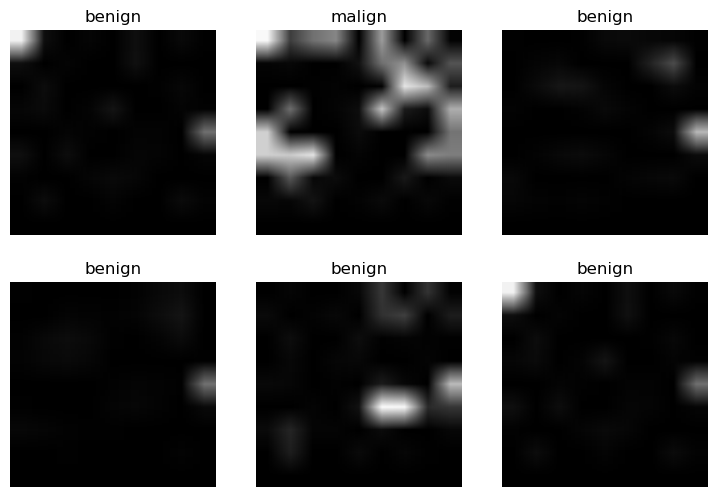

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, #malign or benign
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=128)

dls.show_batch(max_n=6)

In [8]:
roc=RocAucBinary()
learn = vision_learner(dls,resnet34, metrics=roc)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


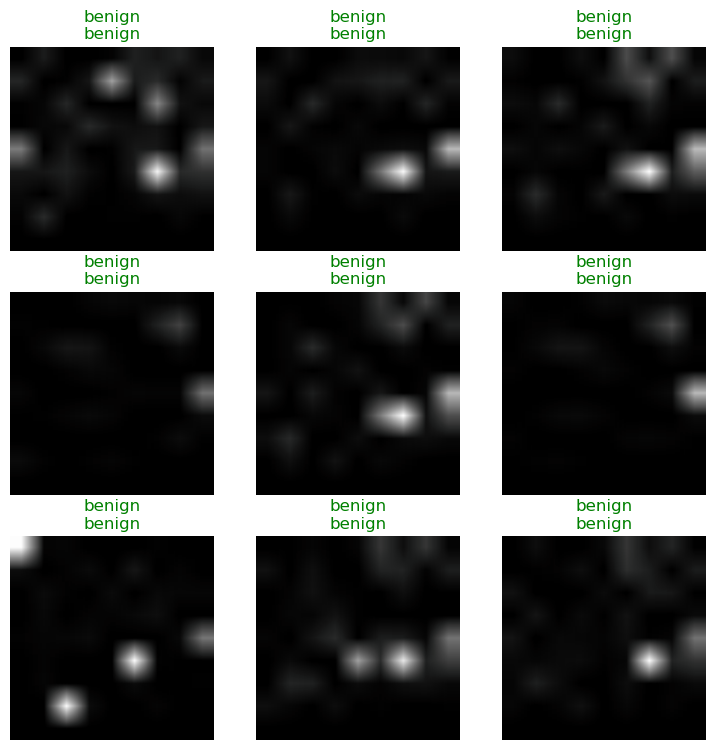

In [9]:
learn.show_results()


In [10]:
path=Path('/project_ghent/raman/cic-ids2017/subset/flow_images/test')

In [11]:
y_true=[]
pred=[]
for img in get_image_files(path):
    pred.append(learn.predict(img)[0])
    y_true.append(parent_label(img))

In [12]:
y_true=[0 if x=='benign' else 1 for x in y_true]
pred=[0 if x=='benign' else 1 for x in pred]


In [13]:
schemas=["train_2017-test_2017","train_2018-test_2018","train_2017-test_2018","train_2018-test_2017"]
results=[]

In [14]:
from sklearn.metrics import roc_auc_score
results.append(roc_auc_score(y_true, pred))
results

[0.8140561006511682]

In [15]:
def train_and_test(train_path,test_path):
    dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label, #malign or benign
        item_tfms=[Resize(192, method='squish')]
    ).dataloaders(train_path, bs=128)

    dls.show_batch(max_n=6)

    roc=RocAucBinary()
    learn = vision_learner(dls,resnet34, metrics=roc)
    learn.fine_tune(3)
    y_true=[]
    pred=[]
    for img in get_image_files(test_path):
        pred.append(learn.predict(img)[0])
        y_true.append(parent_label(img))

    y_true=[0 if x=='benign' else 1 for x in y_true]
    pred=[0 if x=='benign' else 1 for x in pred]
    return roc_auc_score(y_true, pred)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[0.8140561006511682, 0.5513673564442079]

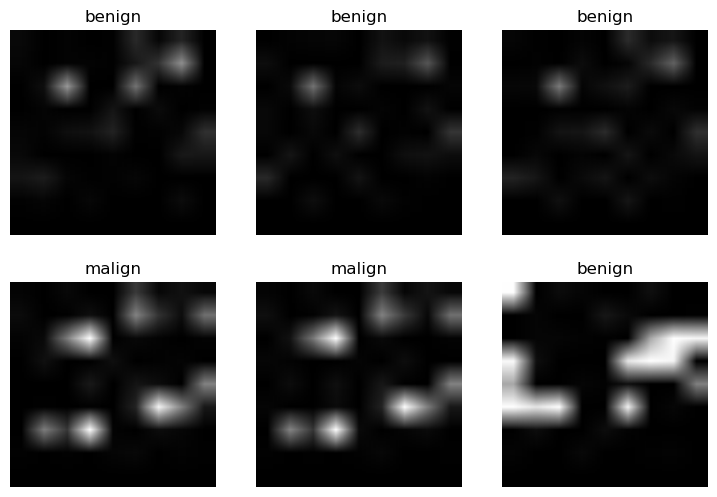

In [16]:
results.append(train_and_test(Path('/project_ghent/raman/cic-ids2018/subset/flow_images/train'),Path('/project_ghent/raman/cic-ids2018/subset/flow_images/test')))
results

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[0.8140561006511682, 0.5513673564442079, 0.47808176918563505]

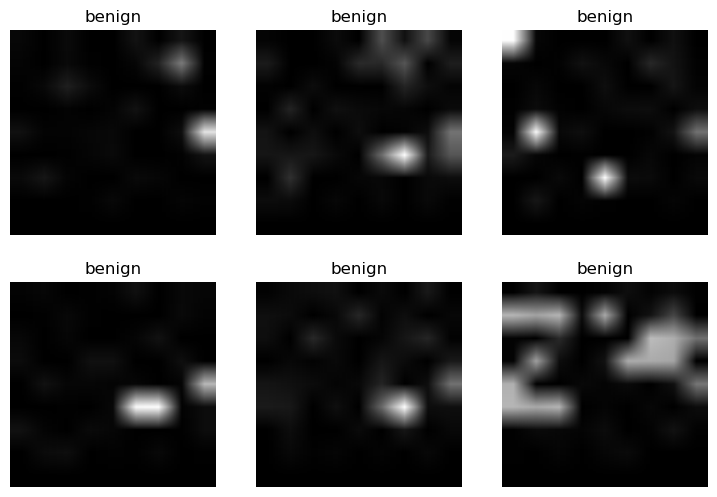

In [17]:
results.append(train_and_test(Path('/project_ghent/raman/cic-ids2017/subset/flow_images/train'),Path('/project_ghent/raman/cic-ids2018/subset/flow_images/test')))
results

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[0.8140561006511682,
 0.5513673564442079,
 0.47808176918563505,
 0.5759671764047261]

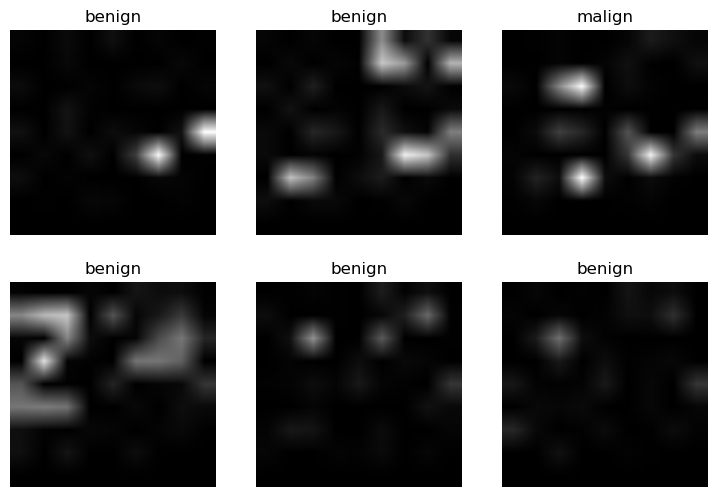

In [18]:
results.append(train_and_test(Path('/project_ghent/raman/cic-ids2018/subset/flow_images/train'),Path('/project_ghent/raman/cic-ids2017/subset/flow_images/test')))
results

In [25]:
pd.DataFrame(results,schemas,columns=["results"])

results
train_2017-test_2017  0.814056
train_2018-test_2018  0.551367
train_2017-test_2018  0.478082
train_2018-test_2017  0.575967